In [72]:
'''
https://machinelearningmastery.com/feature-selection-for-regression-data/
https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
https://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python
'''


'\nhttps://machinelearningmastery.com/feature-selection-for-regression-data/\nhttps://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a\nhttps://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b\nhttps://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python\n'

In [73]:
'''
MAE (Mean absolute error) represents 
the difference between the original 
and predicted values extracted by 
averaged the absolute difference over 
the data set.
MAE = 1/n(sum(abs(y_test-y_pred)))
'''

'\nMAE (Mean absolute error) represents \nthe difference between the original \nand predicted values extracted by \naveraged the absolute difference over \nthe data set.\nMAE = 1/n(sum(abs(y_test-y_pred)))\n'

Importamos las librerias necesarias.
Necesitaremos sklearn que es una librería de machine learning que cuenta con algoritmos como regresión, clasificación, maquinas de soporte vectorial, entre otras.

In [74]:
import pandas as pd
import numpy as np
import os
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

Importamos el dataset y con la ayuda de os.chdir 
especificamos nuetro directorio de trabajo

In [75]:
#os.chdir("/home/nacho/Documents/ares_materials")
df1 = pd.read_csv('dataset2.csv', index_col=0)
print(df1.shape)
df1.head(5)

(63, 59)


,AMID_O,Acrylate,MATS6i,ATS6v,SpAbs_Dzpe,ATSC3se,GATS2m,SRW09,VSA_EState2,ATSC2pe,...,GATS4are,BCUTp-1l,VSA_EState8,SsssCH,GATS7s,AATS6se,BalabanJ,Methacrylate,MATS1s,out
0,0.442037,0.000,0.014671,15277.441019,175.089468,-0.929131,0.944931,0.000000,29.145280,1.528568,...,1.831308,0.740457,4.397244,0.000000,0.728601,8.004635,3.577158,0.0,-0.041022,5.540
1,0.442037,0.000,0.014671,15277.441019,175.089468,-0.929131,0.944931,0.000000,29.145280,1.528568,...,1.831308,0.740457,4.397244,0.000000,0.728601,8.004635,3.577158,0.0,-0.041022,5.535
2,0.442037,0.000,0.014671,15277.441019,175.089468,-0.929131,0.944931,0.000000,29.145280,1.528568,...,1.831308,0.740457,4.397244,0.000000,0.728601,8.004635,3.577158,0.0,-0.041022,4.531
3,0.440333,1.417,-0.089199,19665.115163,273.430912,-1.606241,0.939734,3.456878,50.793647,2.772429,...,1.413942,0.738826,4.142567,1.635356,1.137419,7.718127,2.238026,0.0,-0.007146,1100.490
4,0.442037,0.000,0.014671,15277.441019,175.089468,-0.929131,0.944931,0.000000,29.145280,1.528568,...,1.831308,0.740457,4.397244,0.000000,0.728601,8.004635,3.577158,0.0,-0.041022,1.256


In [76]:
# exploratory data analysis

In [77]:
df1.info()
#No hay datos nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AMID_O        63 non-null     float64
 1   Acrylate      63 non-null     float64
 2   MATS6i        63 non-null     float64
 3   ATS6v         63 non-null     float64
 4   SpAbs_Dzpe    63 non-null     float64
 5   ATSC3se       63 non-null     float64
 6   GATS2m        63 non-null     float64
 7   SRW09         63 non-null     float64
 8   VSA_EState2   63 non-null     float64
 9   ATSC2pe       63 non-null     float64
 10  AATSC1d       63 non-null     float64
 11  Xp-4dv        63 non-null     float64
 12  SsCH3         63 non-null     float64
 13  AATSC8dv      63 non-null     float64
 14  VE3_Dzp       63 non-null     float64
 15  AATS6v        63 non-null     float64
 16  ATSC3m        63 non-null     float64
 17  VR1_Dzv       63 non-null     float64
 18  TIC2          63 non-null     fl

In [78]:
df1.isnull().sum()

AMID_O          0
Acrylate        0
MATS6i          0
ATS6v           0
SpAbs_Dzpe      0
ATSC3se         0
GATS2m          0
SRW09           0
VSA_EState2     0
ATSC2pe         0
AATSC1d         0
Xp-4dv          0
SsCH3           0
AATSC8dv        0
VE3_Dzp         0
AATS6v          0
ATSC3m          0
VR1_Dzv         0
TIC2            0
EState_VSA4     0
AATSC6s         0
MATS5s          0
ZMIC0           0
ATS2p           0
MATS1m          0
MATS2d          0
Xch-6d          0
VE2_DzZ         0
AATS1v          0
MATS4c          0
AATSC3are       0
VR1_Dzm         0
SRW07           0
ETA_beta_s      0
AATSC0m         0
AATSC2d         0
ATSC6c          0
MATS3s          0
ABC             0
ETA_dAlpha_A    0
Acrylate.1      0
AETA_eta_FL     0
ATSC5pe         0
BCUTpe-1l       0
GATS7Z          0
JGT10           0
SdsCH           0
GATS3se         0
NsssCH          0
GATS4are        0
BCUTp-1l        0
VSA_EState8     0
SsssCH          0
GATS7s          0
AATS6se         0
BalabanJ  

In [79]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AMID_O,63.0,0.462959,0.044015,0.347128,0.441748,4.608515e-01,4.952092e-01,0.530638
Acrylate,63.0,0.501794,0.829583,0.000000,0.000000,0.000000e+00,1.614500e+00,1.986000
MATS6i,63.0,-0.054585,0.145442,-0.296203,-0.188695,1.467123e-02,6.939803e-02,0.100400
ATS6v,63.0,14888.448748,5851.297247,6068.673760,9529.952637,1.527744e+04,2.140945e+04,23551.098219
SpAbs_Dzpe,63.0,192.280688,80.965637,84.993678,127.596243,1.750895e+02,3.006783e+02,310.097250
ATSC3se,63.0,-1.234489,0.868032,-2.573847,-2.286269,-9.291312e-01,-6.939757e-01,0.071988
GATS2m,63.0,0.945075,0.067184,0.822205,0.882839,9.532327e-01,9.760759e-01,1.085988
SRW09,63.0,0.065056,0.441681,0.000000,0.000000,0.000000e+00,0.000000e+00,3.456878
VSA_EState2,63.0,36.828751,20.626251,9.451287,23.559968,2.914528e+01,6.253261e+01,71.793006
ATSC2pe,63.0,1.805568,1.229263,-0.291511,1.058885,1.528568e+00,3.300328e+00,3.859655


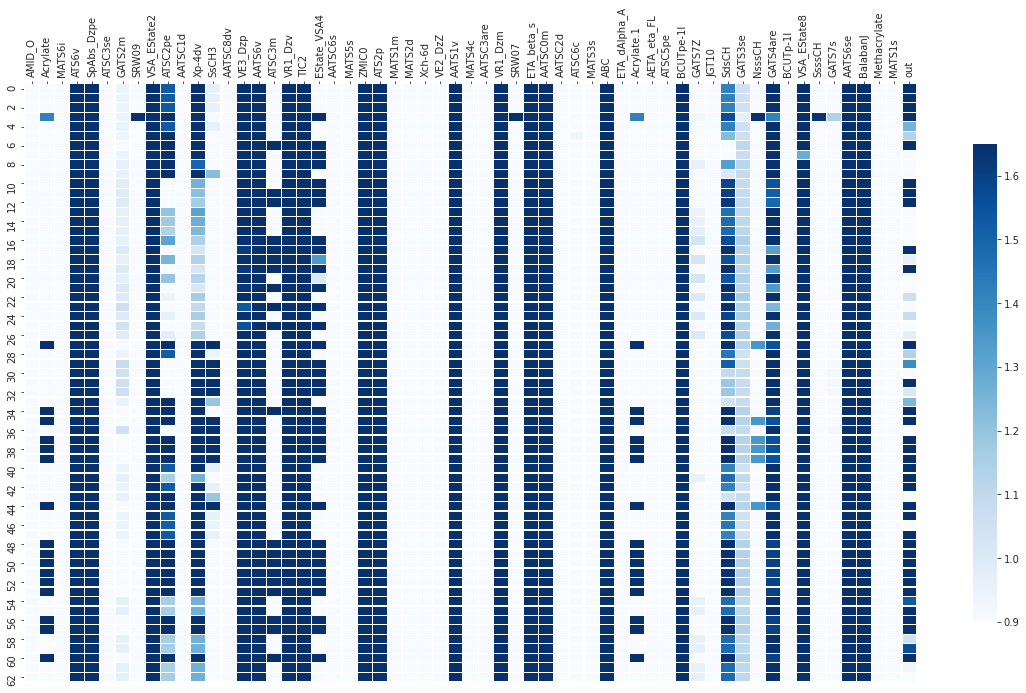

In [80]:
#ColorMap
fig, ax = plt.subplots()
fig.set_size_inches(20, 11)
ax.xaxis.tick_top()
sns.heatmap(df1, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})

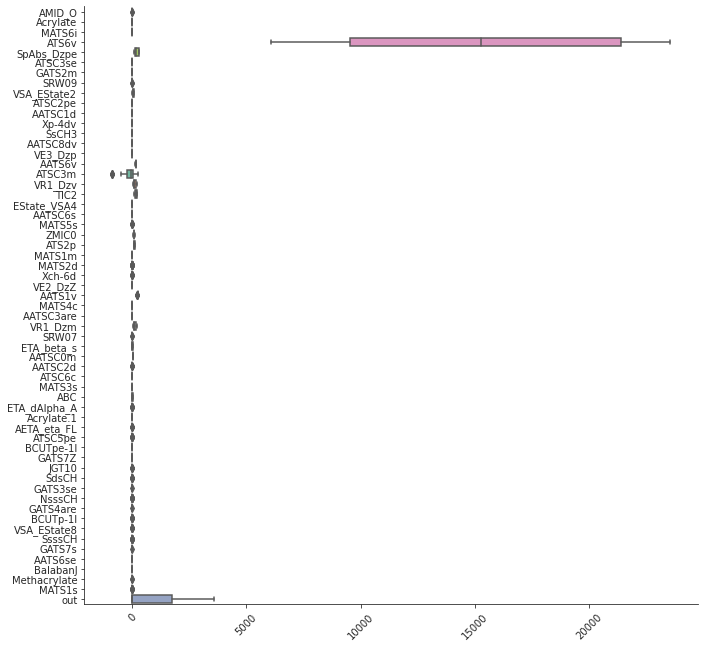

In [81]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.xticks(rotation=45)
sns.despine()


In [82]:
#Columnas que tienen una desviacion estandar mas alta que el promedio de las demas
df_std = df1.describe().loc['std',:][df1.describe().loc['std',:] > df1.describe().loc['std',:].mean()]
print(df_std)
df_std = df_std.to_frame()
columns_std = list(df_std.index)
df1[columns_std].head()

ATS6v     5851.297247
ATSC3m     310.064962
out       1364.465901
Name: std, dtype: float64


,ATS6v,ATSC3m,out
0,15277.441019,-215.077577,5.540
1,15277.441019,-215.077577,5.535
2,15277.441019,-215.077577,4.531
3,19665.115163,-137.759561,1100.490
4,15277.441019,-215.077577,1.256


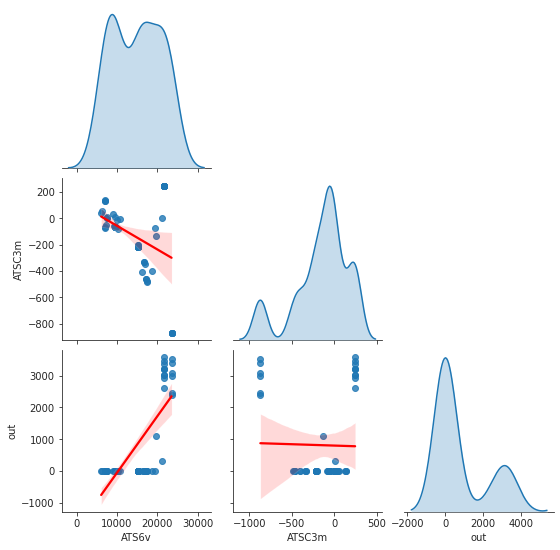

In [83]:
sns.pairplot(df1[columns_std], corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})
#solo dos columnas que tienen alto std tienen baja correlacion

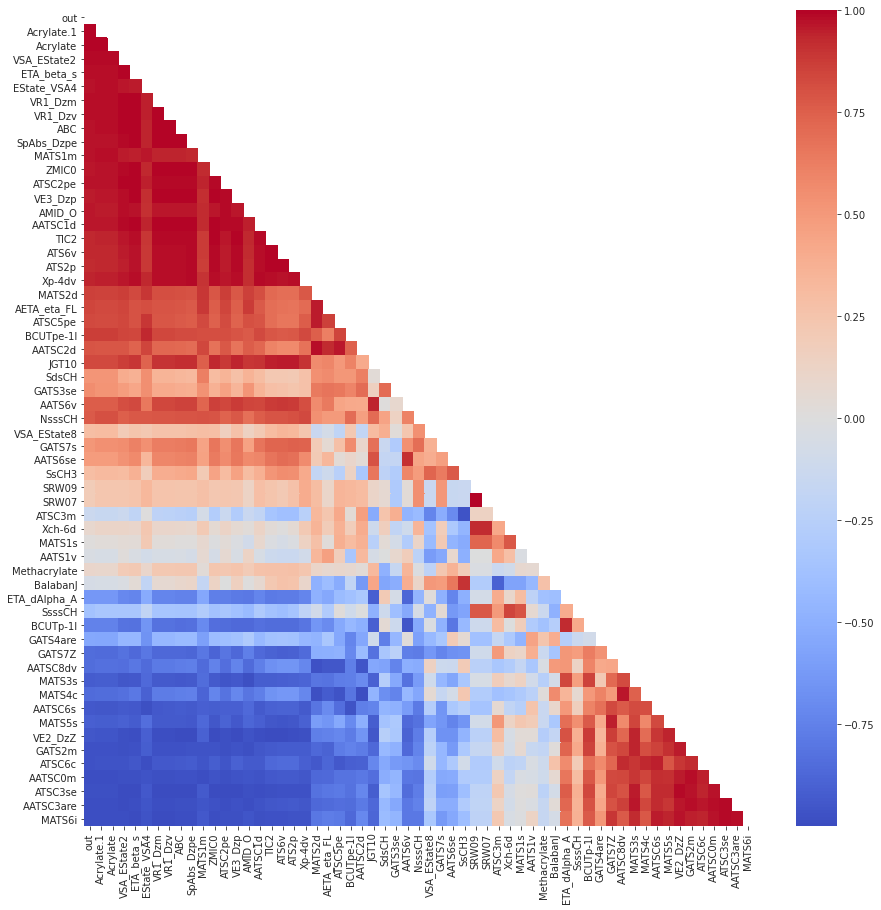

In [84]:
corr = df1.corr()
#sort_corr= corr['out'].abs().sort_values(ascending=False)
sort_corr= corr['out'].sort_values(ascending=False)
corr_matrix = corr[sort_corr.index].corr()
matrix = np.triu(corr_matrix)
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr_matrix, annot=False, mask=matrix,cmap='coolwarm')
#los valores en color suave tienen baja correlacion

In [85]:
#Valor minimo de correlacion
#c = 0.5
c = abs(corr['out']).mean()
#c = 0.25

Acrylate.1     0.981252
Acrylate       0.981252
MATS6i         0.937672
AATSC3are      0.925198
VSA_EState2    0.920902
ETA_beta_s     0.902996
ATSC3se        0.900302
EState_VSA4    0.892110
VR1_Dzm        0.892062
VR1_Dzv        0.891122
AATSC0m        0.881645
ATSC6c         0.880386
ABC            0.879601
SpAbs_Dzpe     0.868278
MATS1m         0.864274
ZMIC0          0.863033
ATSC2pe        0.859589
VE3_Dzp        0.831848
AMID_O         0.830244
GATS2m         0.823464
VE2_DzZ        0.804360
AATSC1d        0.779347
TIC2           0.766487
ATS6v          0.763438
MATS5s         0.752362
ATS2p          0.730720
AATSC6s        0.729364
Xp-4dv         0.725642
MATS4c         0.713698
MATS3s         0.647474
MATS2d         0.631219
AATSC8dv       0.625514
AETA_eta_FL    0.612395
ATSC5pe        0.607556
Name: out, dtype: float64


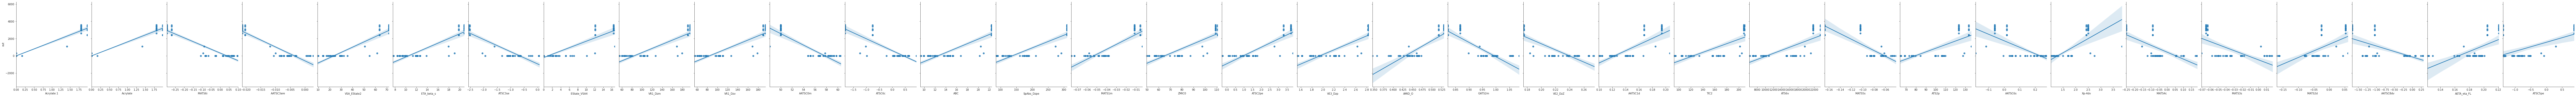

In [86]:
#columnas que tienen una correlacion mayor 
high_corr= abs(corr['out'])[abs(corr['out']) > c]
#high_corr= corr['out'][corr['out'] > corr.out.mean()]
high_corr = high_corr.drop(labels=['out'])
print(high_corr.sort_values(ascending=False))
columns_high_corr = list(high_corr.sort_values(ascending=False).to_frame().index)
#plot
sns.pairplot(df1, x_vars=columns_high_corr, y_vars=["out"], height=5, aspect=.8, kind="reg")

In [87]:
#columnas que tienen una correlacion menor 
low_corr= abs(corr['out'])[abs(corr['out']) < c]
#low_corr= corr['out'][corr['out'] < corr.out.mean()]
print(low_corr.sort_values())
df_low_corr = low_corr.sort_values().to_frame()
columns_low_corr = list(df_low_corr.index)

SRW07           0.012926
SRW09           0.012926
ATSC3m          0.019536
Xch-6d          0.025444
MATS1s          0.071089
AATS1v          0.073941
Methacrylate    0.088664
BalabanJ        0.108747
SsCH3           0.122174
AATS6se         0.168770
GATS7s          0.186774
ETA_dAlpha_A    0.223118
SsssCH          0.225735
VSA_EState8     0.259927
BCUTp-1l        0.279002
GATS4are        0.388772
NsssCH          0.395170
AATS6v          0.399693
GATS3se         0.411237
SdsCH           0.449670
JGT10           0.539478
AATSC2d         0.569951
GATS7Z          0.584217
BCUTpe-1l       0.585056
Name: out, dtype: float64


In [88]:
#se eliminan las columnas con poca correlacion
df_highcorr = df1.drop(df1[columns_low_corr],axis=1)
df_highcorr.shape

(63, 35)

In [89]:
#Multivariate Regression

In [90]:
#Dividimos nuestros datos en "x" y "y" excluyendo la columna out

In [99]:
#X = df1.loc[:, df1.columns != 'out']
#y = df1.loc[:, df1.columns == 'out'].values.ravel()
X = df_highcorr.loc[:, df_highcorr.columns != 'out']
y = df_highcorr.loc[:, df_highcorr.columns == 'out'].values.ravel()

In [92]:
Dividimos el dataset en datos de entrenamiento y datos que nos servirán para el testing (en este caso el 33% de los datos).

SyntaxError: invalid syntax (<ipython-input-92-a65dfc360fa0>, line 1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [112]:
#Tune the Number of Selected Features

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.5f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.5f with: %r" % (mean, param))

Best MAE: -53688.92415
Best Config: {'sel__k': 29}
>-56773.13335 with: {'sel__k': 14}
>-56256.43809 with: {'sel__k': 15}
>-131778.04940 with: {'sel__k': 16}
>-69593.70029 with: {'sel__k': 17}
>-87437.93110 with: {'sel__k': 18}
>-120550.20868 with: {'sel__k': 19}
>-93254.09748 with: {'sel__k': 20}
>-167698.36256 with: {'sel__k': 21}
>-144832.05295 with: {'sel__k': 22}
>-135902.80380 with: {'sel__k': 23}
>-145050.40193 with: {'sel__k': 24}
>-128288.31201 with: {'sel__k': 25}
>-133524.23716 with: {'sel__k': 26}
>-107771.33437 with: {'sel__k': 27}
>-98520.91386 with: {'sel__k': 28}
>-53688.92415 with: {'sel__k': 29}
>-94767.85991 with: {'sel__k': 30}
>-93246.42981 with: {'sel__k': 31}
>-92809.07173 with: {'sel__k': 32}
>-94293.05947 with: {'sel__k': 33}
>-101445.13298 with: {'sel__k': 34}


In [113]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=results.best_params_['sel__k'])
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Model Selection: realizamos el entrenamiento utilizando varios modelos de regresión diferentes

In [114]:
classifiers = [
    svm.SVR(),
    linear_model.Ridge(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.LassoCV(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
    ]

Definimos las llaves del diccionario y lo creamos junto con una lista vacia

In [116]:
dict_list = ['name', 'y_pred', 'mae', 'model']
class_dict = {}
class_list = []

Iteramos todos los modelos y almacenamos el atributo name y cada modelo calcula los modelos más óptimos para los pesos utilizando los valores de entrada y salida de los datos de entrenamiento.

Utilizamos mean absolute error (MAE) para encontrar cual de todos los modelos nos da el error mas pequeño.

In [117]:
for i, classifier in enumerate(classifiers):
    class_dict = {}
    class_dict[dict_list[0]] = (classifiers[i].__class__.__name__)
    clf = classifier
    pipeline = Pipeline(steps=[
    #('scaler', MinMaxScaler()),
    #('scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model', clf)
    ])

    pipeline.fit(X_train_fs, y_train)
    y_pred = pipeline.predict(X_test_fs)

    #pipeline.fit(X_train, y_train)
    #y_pred = pipeline.predict(X_test)

    class_dict[dict_list[1]] = y_pred
    mae = metrics.mean_absolute_error(y_test, y_pred)
    class_dict[dict_list[2]] = mae
    class_dict[dict_list[3]] = clf
    class_list.append(class_dict)

Analizamos los datos 'mae' del diccionario y encontramos el más pequeño, en este caso fue.

In [118]:
minl = []
for dicts in class_list:
    #print(dicts['name'])
    minl.append(dicts['mae'])

min_mae = min(minl)

def return_best_mae(class_list, min_mae):
    for dicts in class_list:
        if dicts['mae'] == min_mae:
            return dicts

best_mae = return_best_mae(class_list, min_mae)
print(best_mae)
#with best model do a hiperparameter tuning


{'name': 'LinearRegression', 'y_pred': array([-1.20706399e-01,  2.99100000e+03,  3.15966667e+03,  2.99100000e+03,
        1.10692589e+00,  3.32582777e+00,  1.28751892e+00,  3.32582777e+00,
        1.10692589e+00,  2.99100000e+03,  2.99100000e+03,  3.15966667e+03,
        2.99100000e+03, -1.09760319e-02,  3.15966667e+03,  3.15966667e+03,
        9.71665183e+02,  3.32582777e+00,  8.81122251e-01,  1.73005202e+00,
        1.10692589e+00]), 'mae': 137.3412545668509, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}


In [ ]:
'''
WITH HIGH CORR DATA AND FEATURE SELECTION
{'name': 'LinearRegression', 'y_pred': array([-1.20706399e-01,  2.99100000e+03,  3.15966667e+03,  2.99100000e+03,
        1.10692589e+00,  3.32582777e+00,  1.28751892e+00,  3.32582777e+00,
        1.10692589e+00,  2.99100000e+03,  2.99100000e+03,  3.15966667e+03,
        2.99100000e+03, -1.09760319e-02,  3.15966667e+03,  3.15966667e+03,
        9.71665183e+02,  3.32582777e+00,  8.81122251e-01,  1.73005202e+00,
        1.10692589e+00]), 'mae': 137.3412545668498, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
'''

In [ ]:
'''
WITH HIGH CORRELATION DATA AND NO FEATURE SELECTION
{'name': 'TheilSenRegressor', 'y_pred': array([-2.25046080e-01,  2.99699999e+03,  3.16056412e+03,  2.99699999e+03,
        1.09108788e+00,  3.36129730e+00,  1.28877976e+00,  3.36129730e+00,
        1.09108788e+00,  2.99699999e+03,  2.99699999e+03,  3.16056412e+03,
        2.99699999e+03, -9.81908017e-02,  3.16056412e+03,  3.16056412e+03,
        9.84628893e+02,  3.36129730e+00,  9.26841577e-01,  1.73531961e+00,
        1.09108788e+00]), 'mae': 136.35954417743602, 'model': TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH ALL DATA AND FEATURE SELECTION
{'name': 'TheilSenRegressor', 'y_pred': array([ 1.87949378e+00,  2.98744199e+03,  3.15567637e+03,  2.98744199e+03,
        6.19199378e+00,  6.56699378e+00,  8.56699378e+00,  6.56699378e+00,
        6.19199378e+00,  2.98744199e+03,  2.98744199e+03,  3.15567637e+03,
        2.98744199e+03,  6.81699378e+00,  3.15567637e+03,  3.15567637e+03,
        9.08191994e+02,  6.56699378e+00, -1.35892562e+01,  1.86607438e+01,
        6.06699378e+00]), 'mae': 143.30874851925722, 'model': TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH ALL DATA (no correlation or feature selection)
{'name': 'TheilSenRegressor', 'y_pred': array([ 1.87949378e+00,  2.98744199e+03,  3.15567637e+03,  2.98744199e+03,
        6.19199378e+00,  6.56699378e+00,  8.56699378e+00,  6.56699378e+00,
        6.19199378e+00,  2.98744199e+03,  2.98744199e+03,  3.15567637e+03,
        2.98744199e+03,  6.81699378e+00,  3.15567637e+03,  3.15567637e+03,
        9.08191994e+02,  6.56699378e+00, -1.35892562e+01,  1.86607438e+01,
        6.06699378e+00]), 'mae': 143.30874851925722, 'model': TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)}
'''

Graficamos los resultados

Text(0.5, 0, 'Errors')

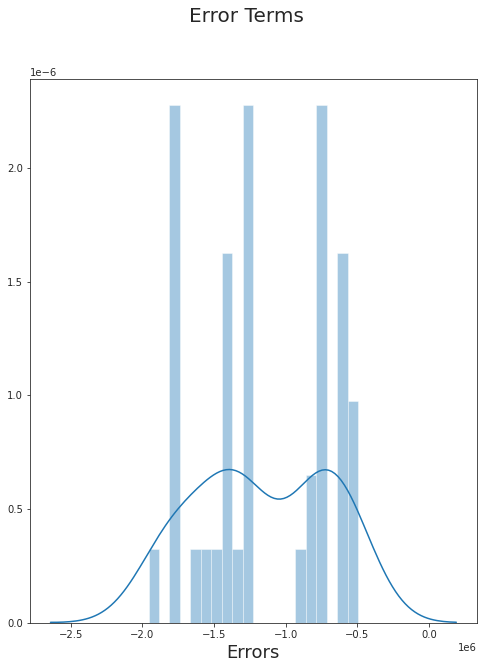

In [119]:
#Residual Analysis

y_train_price = best_mae['model'].predict(X_train_fs)
#y_train_price = best_mae['model'].predict(X_train)

#plot
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)    

Text(0.5, 1.0, 'Feature importance using LinearRegression\nwith MAE: 137.3412545668509')

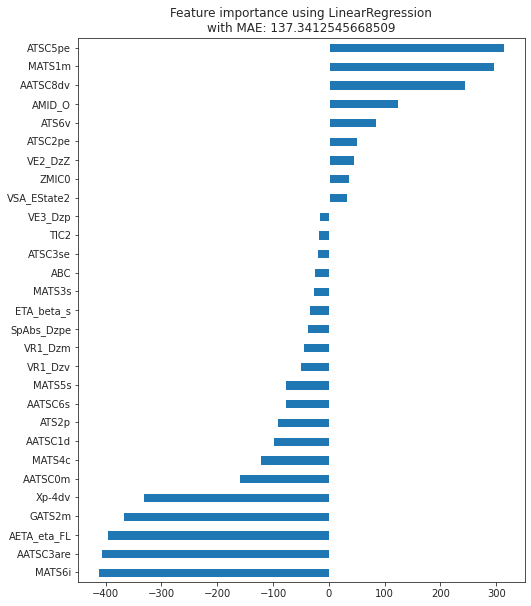

In [120]:
#Feature Importance

fs_index = fs.get_support(indices=True)
fs_columns = X.iloc[:,fs_index].columns
coef = pd.Series(best_mae['model'].coef_, index = fs_columns)

#coef = pd.Series(best_mae['model'].coef_, index = X.columns)

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(f"Feature importance using {best_mae['name']}\nwith MAE: {best_mae['mae']}")


In [121]:
high_corr.sort_values(ascending=False)

Acrylate.1     0.981252
Acrylate       0.981252
MATS6i         0.937672
AATSC3are      0.925198
VSA_EState2    0.920902
ETA_beta_s     0.902996
ATSC3se        0.900302
EState_VSA4    0.892110
VR1_Dzm        0.892062
VR1_Dzv        0.891122
AATSC0m        0.881645
ATSC6c         0.880386
ABC            0.879601
SpAbs_Dzpe     0.868278
MATS1m         0.864274
ZMIC0          0.863033
ATSC2pe        0.859589
VE3_Dzp        0.831848
AMID_O         0.830244
GATS2m         0.823464
VE2_DzZ        0.804360
AATSC1d        0.779347
TIC2           0.766487
ATS6v          0.763438
MATS5s         0.752362
ATS2p          0.730720
AATSC6s        0.729364
Xp-4dv         0.725642
MATS4c         0.713698
MATS3s         0.647474
MATS2d         0.631219
AATSC8dv       0.625514
AETA_eta_FL    0.612395
ATSC5pe        0.607556
Name: out, dtype: float64

No handles with labels found to put in legend.


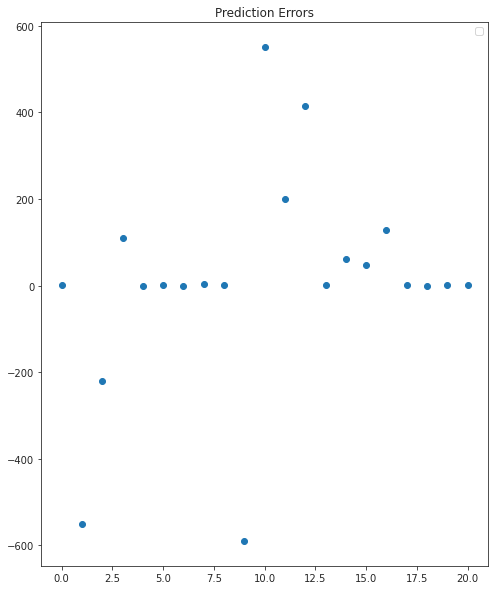

In [122]:
plt.plot(y_test - best_mae['y_pred'],marker='o',linestyle='')
plt.title("Prediction Errors")
plt.legend()
plt.show() 